# **Analysis on Zomato Restaurants in India**

We will be doing **Exploratory Data Analysis** to analyse and investigate data sets and summarize their main characteristics, often employing data visualization methods.

![image](https://i.imgur.com/7wbpoDf.jpg)



Here in this notebook I have picked a dataset containing details regarding the zomato online delivery from hotels across different cities of India. This dataset has list of 99 cities where Zomato has started to deliver food to make people get their desired food on time and anytime. I found this dataset on kaggle, If you want to see the dataset on kaggle click [here](https://www.kaggle.com/datasets/pranavuikey/zomato-eda)

Let's first talk a little bit about the dataset:

The dataset contains more than 2,11,944 rows and 26 columns (this data has been updated around two months ago i.e, August 2022).
Columns in the dataset has indexed as ` res_id, name, establishment, address, city, city_id,locality, latitude, longitude, zipcode, country_id,   locality_verbose, cuisines, timings, average_cost_for_two, price_range,currency, highlights, aggregate_rating, rating_text, votes, photo_count,opentable_support, delivery, takeaway`. But we are interested in few them, so I'll not talk about the remaining columns.
Let's talk about some specific columns:

Note: For details of rest of the columns please visit the page, link is available above.

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
!pip install opendatasets --upgrade --quiet

## Outline:
We will finish our project in four steps as follows:

**`1 Data Downloading`** We will install all the required libraries to download the dataset.

**`2 Data Preparation & Cleaning`** We will start checking whether the dataset is clean or not, like if there are any duplicate entries, missing values or any other misguiding data, which may lead us to bad results.

**3 `Visualization`** We will start analyzing the dataset, with some visualization on different columns, try to set relationship between columns and make inferences.

**4 `Q & A`** We will try to answer some interesting questions based on the data available and what a person can ask in general.

 **` Step 1: Data Downloading `**

---



Let's first start with installing and importing required libraries and modules, that we are going to use in this entire project notebook.

- We will install `Numpy` library for mathematical computations,
- We will install `Pandas` library, as we will do our whole analysis on the entire dataset using pandas dataframe,
- We will install `jovian` library to keep our a copy of our notebook on Jovian platform,
- We will install `opendatasets` library for downloading the dataset from the [kaggle](https://www.kaggle.com/datasets)
- We will install `Plotly` to create some visualization

And finally we will import some useful modules from these libraries.

In [90]:
!pip install jovian --upgrade --quiet
#Installing jovian library
!pip install numpy --quiet
#Installing numpy library
!pip install opendatasets --upgrade --quiet
#Installing opendatasets library,
!pip install plotly --upgrade --quiet
#Installing plotly for visualization graphs and charts.

In [91]:
!pip install pandas --quiet
#Installing pandas library

In [92]:
import jovian
import pandas as pd
import numpy as np
import opendatasets as od
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [96]:
download_url = 'https://www.kaggle.com/datasets/rabhar/zomato-restaurants-in-india'

od.download(download_url)

Skipping, found downloaded files in "./zomato-restaurants-in-india" (use force=True to force download)


In [97]:
data_filename = 'zomato-restaurants-in-india/zomato_restaurants_in_India.csv'

In [98]:
df = pd.read_csv(data_filename)

 **` Step 2: Data Preparation and Cleaning `**

Now we will take a quick look on the dataset one by one, and check:
- Whether the datasets contains any duplicate values
- How many `NaN` values are there
- How many missing values are there
- If there is any unexpected value in any of the columns

And finally we will crop the dataset with all the required columns that we will need for our analysis part.


In [179]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [180]:
df.shape
# We can find the number of columns using len(df.columns)
# Similarly, we can find rows using len(df)

(211944, 26)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [107]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [185]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [108]:
df.columns
# It shows the description of columns from the dataset

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [109]:
df.isna()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211940,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211941,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211942,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Look `.isna()`  has retured a dataframe having bool values. Neverthless, since our dataset is quite large this output is difficult to interpret and make sense of. So, let us try and make a few visualisations that will give us a clearer picture of the extent of missing values present in our dataset.

In [186]:
df.drop_duplicates(["res_id"],keep='first',inplace=True)
df.shape

(55568, 26)

In [187]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55568 entries, 0 to 211942
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                55568 non-null  int64  
 1   name                  55568 non-null  object 
 2   establishment         55568 non-null  object 
 3   url                   55568 non-null  object 
 4   address               55550 non-null  object 
 5   city                  55568 non-null  object 
 6   city_id               55568 non-null  int64  
 7   locality              55568 non-null  object 
 8   latitude              55568 non-null  float64
 9   longitude             55568 non-null  float64
 10  zipcode               10945 non-null  object 
 11  country_id            55568 non-null  int64  
 12  locality_verbose      55568 non-null  object 
 13  cuisines              55098 non-null  object 
 14  timings               54565 non-null  object 
 15  average_cost_for_t

In [189]:
outlets = df["name"].value_counts()
outlets

Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: name, Length: 41100, dtype: int64

 **Check for Null Values**

We will check for the columns which has missing value.


In [190]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

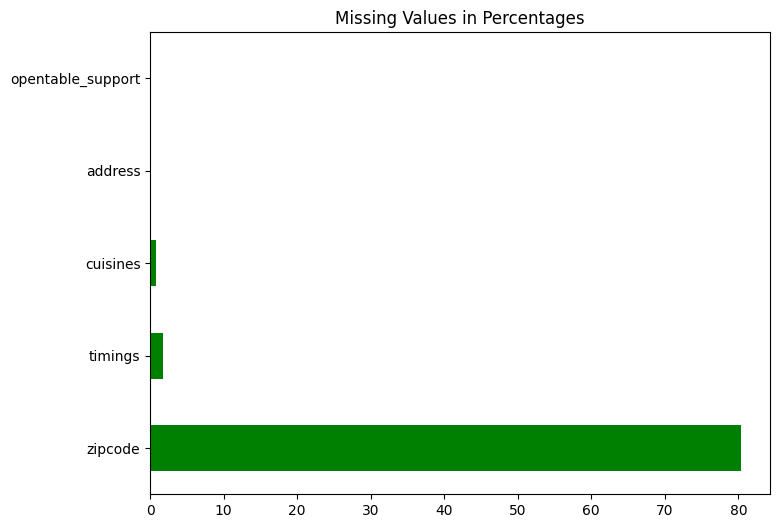

In [191]:
missing_data_df = (df.isna().sum().sort_values(ascending = False)/len(df)*100)
#missing_data_df
missing_data_df[missing_data_df!= 0].plot(kind = 'barh', figsize = (8,6), color = 'green', title = 'Missing Values in Percentages');

We get to know that columns like "Zipcode", "timings", "cuisines", "address" and "opentable_support" have notable missing values. So we will drop off these values as these are not useful in analytical purpose.

 **Cleaning The Data**

In this data cleaning process, we need to perform the following tasks:

  1. Drop off the columns not in use.
  2. Rename the columns if required.
  3. Check for duplicate rows or columns.

In [212]:
#df = pd.read_csv(data_filename)

In [211]:
#city_id_count
# it will give the count of total number of city id in the dataset
city_id_name = df.loc[:,["city","city_id"]]

In [213]:
unique_rows = city_id_name.drop_duplicates()
unique_rows.head(20)

,city,city_id
0,Agra,34
2622,Ahmedabad,11
2709,Gandhinagar,11
5936,Ajmer,11303
9213,Alappuzha,11297
11147,Allahabad,24
13262,Amravati,11335
15114,Amritsar,22
17464,Aurangabad,25
19630,Bangalore,4


There are some abrupt values in the city id column. So we will drop city_id column.

In [192]:
df1 = df.drop(['url','city_id', 'zipcode', 'country_id', 'currency','timings', 'opentable_support' ], axis =1)
df1[:4]

,res_id,name,establishment,address,city,locality,latitude,longitude,locality_verbose,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Shahganj, Agra","Fast Food, Mithai",300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1,-1


In [193]:
df1.shape

(55568, 19)

In [194]:
df1['aggregate_rating'].unique()

array([4.4, 4.2, 4.3, 4.9, 4. , 3.8, 3.4, 4.1, 3.5, 4.6, 3.9, 3.6, 4.5,
       4.7, 3.7, 4.8, 3.2, 0. , 3.3, 2.8, 3.1, 2.6, 3. , 2.7, 2.9, 2.2,
       2.3, 2.4, 2.5, 2.1, 1.8, 2. , 1.9])

In [195]:
df1['establishment'].value_counts()
establishments_list = df1['establishment'].unique().tolist()
establishments_list

["['Quick Bites']",
 "['Casual Dining']",
 "['Bakery']",
 "['Café']",
 "['Dhaba']",
 "['Bhojanalya']",
 "['Bar']",
 "['Sweet Shop']",
 "['Fine Dining']",
 "['Food Truck']",
 "['Dessert Parlour']",
 "['Lounge']",
 "['Pub']",
 "['Beverage Shop']",
 "['Kiosk']",
 "['Paan Shop']",
 "['Confectionery']",
 '[]',
 "['Shack']",
 "['Club']",
 "['Food Court']",
 "['Mess']",
 "['Butcher Shop']",
 "['Microbrewery']",
 "['Cocktail Bar']",
 "['Pop up']",
 "['Irani Cafe']"]

In [196]:
establishments_counts = df1.establishment.value_counts()
establishments_counts

['Quick Bites']        14032
['Casual Dining']      12270
['Café']                4123
['Bakery']              3741
['Dessert Parlour']     3675
['Sweet Shop']          2615
['Beverage Shop']       2440
[]                      1830
['Fine Dining']         1535
['Food Court']          1494
['Bar']                 1399
['Dhaba']               1282
['Kiosk']               1126
['Food Truck']           868
['Lounge']               820
['Bhojanalya']           632
['Mess']                 361
['Pub']                  357
['Paan Shop']            320
['Confectionery']        218
['Butcher Shop']         154
['Club']                 112
['Microbrewery']         110
['Shack']                 20
['Cocktail Bar']          16
['Irani Cafe']            14
['Pop up']                 4
Name: establishment, dtype: int64

In [198]:
establishments_rating = dict(zip(establishments_list, li))
establishments_rating

{"['Quick Bites']": 3.022,
 "['Casual Dining']": 3.239,
 "['Bakery']": 2.576,
 "['Café']": 3.212,
 "['Dhaba']": 2.529,
 "['Bhojanalya']": 1.509,
 "['Bar']": 3.013,
 "['Sweet Shop']": 2.692,
 "['Fine Dining']": 3.437,
 "['Food Truck']": 2.316,
 "['Dessert Parlour']": 3.08,
 "['Lounge']": 3.436,
 "['Pub']": 3.758,
 "['Beverage Shop']": 2.523,
 "['Kiosk']": 2.3,
 "['Paan Shop']": 1.861,
 "['Confectionery']": 1.528,
 '[]': 2.897,
 "['Shack']": 1.425,
 "['Club']": 3.379,
 "['Food Court']": 2.652,
 "['Mess']": 2.102,
 "['Butcher Shop']": 3.11,
 "['Microbrewery']": 4.268,
 "['Cocktail Bar']": 3.531,
 "['Pop up']": 1.8,
 "['Irani Cafe']": 3.321}

## Exploratory Data Analysis & Visualization
In this section we will try to create some visualizations using `Plotly`, Plotly  offers a big range of different kind of graphs and charts, and the plotly graphs are interactive graphs they give much more information than other visualization libraries.

In [200]:
hotel_count = df1.name.unique().size
hotel_count
len(df1.name.unique())
#This will give the unique number of hotels from the dataset.
#These hotel names appear multiple times in the dataset.
# One city can have a number of hotels.

41100

In [202]:
city_count = df1.city.unique().size
city_count
len(df1.city.unique())
# We will get cities in the dataset , this also imply one city have multiple number of hotels and one city has not only one hotel.

99



Columns we will analyze:

1. City - with most number of hotels
2. City with highest rating
3. Hotels with highest rating
3. Timing
5. Average price range
6. Votes (average is 358, look for greater than 400 or 500).

**1. What are the Indian cities with the highest and lowest number of Zomato deliveries?**

The city with maximum number of restaurants will be contributing the most to Zomato financially. It will help them giving exciting offers to the customers. And through this they will analyze where they need to do more advertisement so as to reach maximum customers.

In [214]:
city_count

99

In [275]:
cities_buy = df1.city.value_counts()

In [218]:
cities_buy[:20]
# To get the top 20 cities across India.

Bangalore     2247
Mumbai        2022
Pune          1843
Chennai       1827
New Delhi     1704
Jaipur        1395
Kolkata       1361
Ahmedabad     1247
Goa           1150
Lucknow       1135
Nagpur        1039
Indore        1026
Coimbatore     976
Surat          970
Vadodara       963
Ludhiana       948
Bhopal         906
Kochi          897
Agra           833
Hyderabad      822
Name: city, dtype: int64

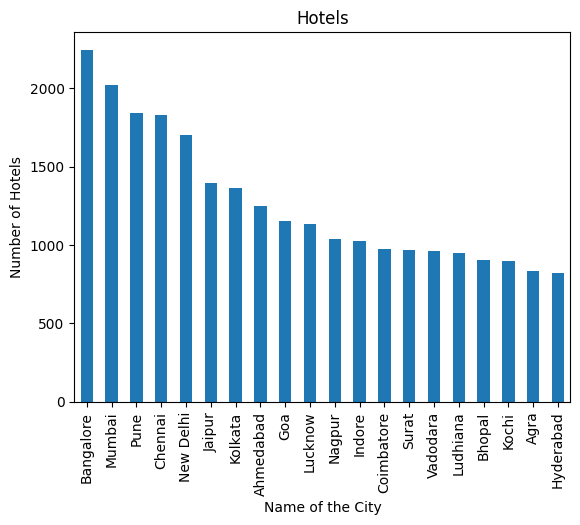

In [219]:
cities_buy[:20].plot(kind= 'bar',
                     title = 'Hotels');
plt.xlabel('Name of the City')
plt.ylabel('Number of Hotels')

# Show the plot
plt.show()

Banglore is the city which has around 2247 restaurants. Mumbai being the second city to have the largest number of restaurants. Top 12 cities in India have more than 1000 restaurants which shows the popularity of the city. Important insight is that there are 5 metro cities in top 10 cities with highest restaurants.

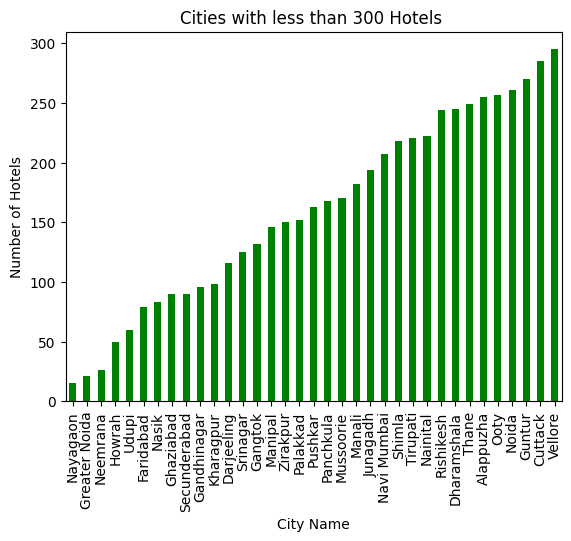

In [277]:
low_city = cities_buy[cities_buy <= 300]
low_city_sorted = low_city.sort_values()
low_city_sorted.plot(kind ='bar', color = 'green');
plt.xlabel('City Name')
plt.ylabel('Number of Hotels')
plt.title('Cities with less than 300 Hotels ');


In [278]:
low_city.tail(15)

Manipal          146
Gangtok          132
Srinagar         125
Darjeeling       116
Kharagpur         98
Gandhinagar       96
Secunderabad      90
Ghaziabad         90
Nasik             83
Faridabad         79
Udupi             60
Howrah            50
Neemrana          26
Greater Noida     21
Nayagaon          15
Name: city, dtype: int64

Nayagaon is the city which has the least number of hotels. Some famous cities like Howrah, Darjeeling and Greater Noida are also there in the lesser hotel lists.

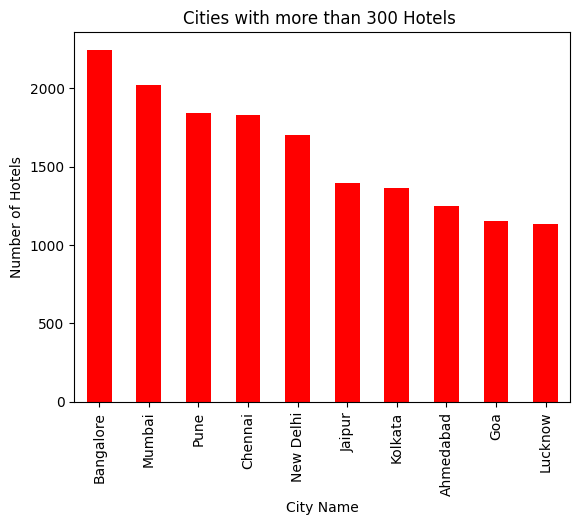

In [279]:
high_city = cities_buy[cities_buy >= 1000].head(10)
high_city.plot(kind ='bar', color = 'red');
plt.xlabel('City Name')
plt.ylabel('Number of Hotels')
plt.title('Cities with more than 300 Hotels ');

**2. How can a graph be represented to depict the hotel ratings for different hotel names?**

In [227]:
 dropped =df1.drop_duplicates(subset = "city")

In [230]:
df1['highlights'].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

In [231]:
# Replace "pure veg" with "veg" in the "Cuisines" column
df1['highlights'] = df1['highlights'].str.replace('Pure veg', 'veg', case=False)

# Print the modified column
print(df1['highlights'])

0         ['Lunch', 'Takeaway Available', 'Credit Card',...
1         ['Delivery', 'No Alcohol Available', 'Dinner',...
2         ['No Alcohol Available', 'Dinner', 'Takeaway A...
3         ['Takeaway Available', 'Credit Card', 'Lunch',...
4         ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
                                ...                        
211882    ['Cash', 'Takeaway Available', 'Delivery', 'In...
211925    ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...
211926    ['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...
211940    ['Dinner', 'Cash', 'Takeaway Available', 'Debi...
211942    ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...
Name: highlights, Length: 55568, dtype: object


In [232]:
df1['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [233]:
hotel_name_rating = dropped.loc[:,["name","aggregate_rating"]]
hotel_name_rating

,name,aggregate_rating
0,Bikanervala,4.4
2622,Ph Se Food,4.5
2709,Wooddy Jhone's Pizza,4.0
5936,Mango Masala Restaurant,4.8
9213,Madras Veg Tables,3.5
...,...,...
200177,Capsicum,4.1
202591,The Vellore Kitchen,3.5
204761,Madhurima Restaurant,4.3
206919,Alpha Hotel,4.4


In [234]:
fig = px.bar(hotel_name_rating,
             x="name",
             y="aggregate_rating",

             title="Hotel with the highest rating"
)
fig.update_layout(height=800)
fig.show()

Bikanerwala is a type of restaurant which has got the best rating among all the hotels. It is not like Bikanerwala is the only outlet in India, rather all the outlets of a particular hotel has contributed to this good rating.

**3. Which cities have highest rating for their services?**

 It tells about the overall rating of the city based on the rating of all the hotels inside the city.

In [235]:
top_99 = dropped.nlargest(99,'aggregate_rating')[['city', 'aggregate_rating']]
top_99
#city with rating

,city,aggregate_rating
134885,Thane,4.9
27257,Bhubaneshwar,4.9
53884,New Delhi,4.9
151290,Nashik,4.9
129079,Mangalore,4.9
...,...,...
61799,Gangtok,3.5
75431,Haridwar,3.4
153619,Neemrana,3.3
127968,Manali,3.3


In [236]:
fig = px.line(top_99,
             x="city",
             y="aggregate_rating",

             title="City with the highest rating"
)
fig.show();

Banglore, Thane & New Delhi are the only metro cities which have the highest rating of 4.9 Kolkata has an aggregate rating of 4.6 & Mumbai has a rating of 4.4. There are cities as well which are not metro city but have better rating.

**4. What are the different types of restaurants and how many of each type are there?**

It will give us the count of different types of restaurants across various cities of India. We could have a number of hotels for varoius types of restaurants. We will plot the bar graph and visualise.

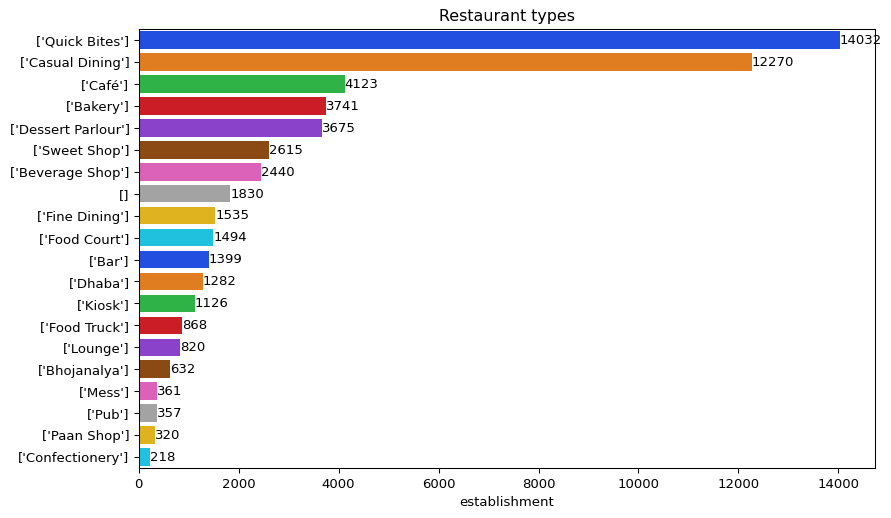

In [237]:
type5 = df1['establishment'].value_counts().head(20)
#display(type1.to_frame())
plt.figure(figsize=(10,6),dpi=95)
sns.barplot(x=type5,y= type5.index ,palette='bright')
for i, v in enumerate(type5):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')
plt.title('Restaurant types');


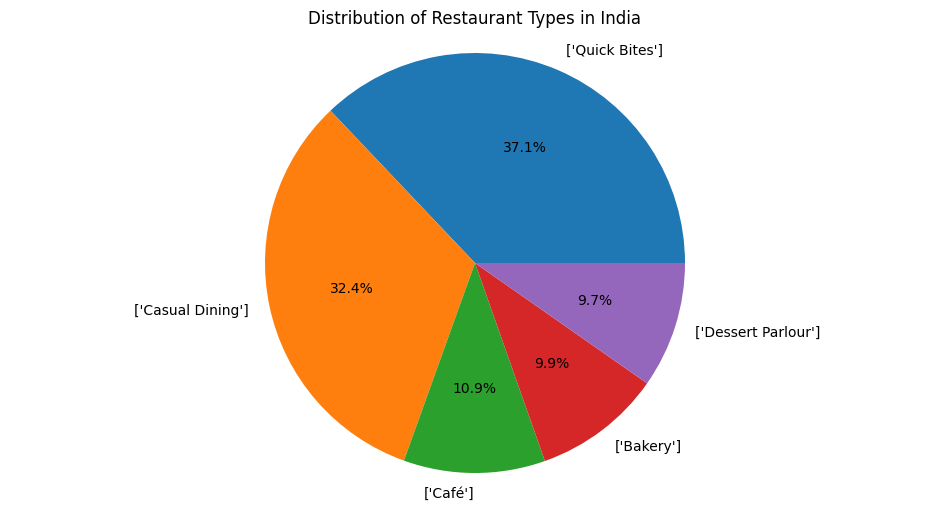

In [243]:
# Count the frequency of each restaurant type
restaurant_types = df1['establishment'].value_counts().head(5)

# Plotting the pie chart
plt.figure(figsize=(12,6))
plt.pie(restaurant_types.values, labels=restaurant_types.index, autopct='%2.1f%%')
plt.title('Distribution of Restaurant Types in India')
plt.axis('equal')
plt.show()

Restaurants having Quick Bites and Casual Dining are the most liked restaurants having 37.1% and 32.4% having restaurant number as 14032 & 12270.

**5. How popular are online food delivery services among restaurants?**

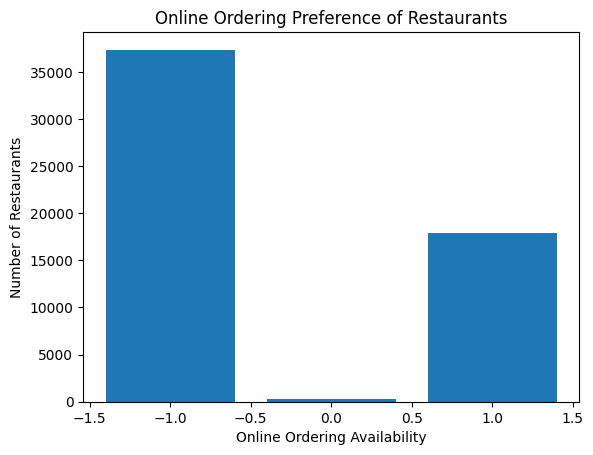

In [244]:
# Count the number of restaurants with online ordering and without online ordering
online_order_counts = df1['delivery'].value_counts()

# Create a bar chart to visualize the online ordering preference
plt.bar(online_order_counts.index, online_order_counts.values)

# Customize the chart labels and title
plt.xlabel('Online Ordering Availability')
plt.ylabel('Number of Restaurants')
plt.title('Online Ordering Preference of Restaurants')

# Show the chart
plt.show()


This bar chart showcase the proportion of restaurants that offer online ordering versus those that do not. This visualization reveals that there are only 50% of total restaurants which provide online delivery.

**6. What is the rating given for online delivery of restaurants?**

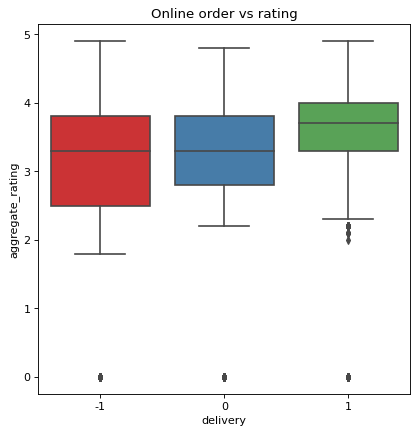

In [245]:
plt.figure(figsize=(6,6),dpi=80)
plt.title('Online order vs rating')
sns.boxplot(x='delivery',y='aggregate_rating',data=df1,palette='Set1');


The resulting plot show boxes representing the distribution of restaurant ratings grouped by the availability of online orders. It provides insights into how online order availability impact the distribution of ratings, such as differences in median, quartiles, and potential outliers between the two groups.

**7. How can a scatter plot be used to visualize the relationship between the average cost for two people and the ratings of restaurants?**

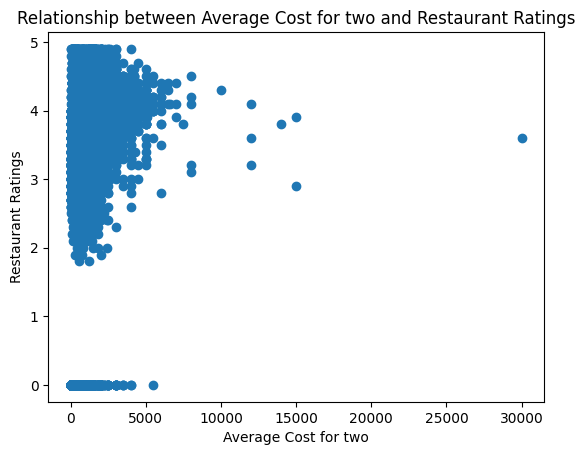

In [246]:
df2 = df1[['average_cost_for_two', 'aggregate_rating']]

# Drop rows with missing values
df2.dropna(inplace=True)

# Create a scatter plot
plt.scatter(df2['average_cost_for_two'], df['aggregate_rating'])
plt.xlabel('Average Cost for two')
plt.ylabel('Restaurant Ratings')
plt.title('Relationship between Average Cost for two and Restaurant Ratings')

# Display the plot
plt.show()

The price range for most of the restaurants is around 7000 and rating increases with price range, but most of the restaurants having prices around 5000 have around 5 as its rating. We have some outliers as well where the restaurant don't offer a unique dining experience regardless of the cost.

 **8. How can a treemap be utilized to visualize the distribution of restaurants based on their price range and type of cuisine?**

In [281]:
# Group the data by price range and cuisine type, and calculate the count of restaurants
grouped_data = df1.groupby(['average_cost_for_two', 'establishment']).size().reset_index(name='Count')

# Create the treemap visualization
fig = px.treemap(grouped_data, path=['average_cost_for_two', 'establishment'], values='Count')

# Set the title and labels
fig.update_layout(title="Restaurant Distribution by Price Range and Cuisine Type")
fig.update_traces(textinfo="label+value")

# Display the treemap
fig.show()


This treemap allows us to see the distribution of restaurants across different price ranges and cuisine types. Each rectangle in the treemap represents the count of restaurants in that particular combination of price range and cuisine.
By observing the relative sizes of the rectangles, we can understand the proportional representation of each combination within the dataset.

## Questions and Answers


**1. What is the correlation between average cost for two people and restaturant rating?**

In [272]:
# Select the relevant columns
df3 = df1[['average_cost_for_two', 'aggregate_rating']]

# Drop rows with missing values
df3.dropna(inplace=True)

# Calculate the correlation
correlation = df3['average_cost_for_two'].astype(float).corr(df['aggregate_rating'].astype(float))

# Print the correlation coefficient
print("Correlation between Average Cost for two and Aggregate rating:", correlation)


Correlation between Average Cost for two and Aggregate rating: 0.250044552382183


If the correlation value is close to +1, it indicates a strong positive correlation. This means that as the average cost for two people increases, the restaurant ratings tend to be higher.

If the correlation value is close to -1, it indicates a strong negative correlation. This means that as the average cost for two people increases, the restaurant ratings tend to be lower.

If the correlation value is close to 0, it indicates a weak or no correlation. This means that there is no significant relationship between the average cost for two people and the restaurant ratings.

Here the correlation is 0.25, which is a good sign for the high ratings of the restaurants. It tells the restaurants with high prices provide good services to their customers and hence good review.

**2. What is the distribution of average cost for two people across different cities of India?**

In [273]:
# Group the data by city and calculate the average cost for two people
avg_cost_by_city = df1.groupby('city')['average_cost_for_two'].mean().reset_index()

# Create a Folium map centered around India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers to the map for each city with average cost information
for index, row in avg_cost_by_city.iterrows():
    city = row['city']
    avg_cost = row['average_cost_for_two']
    tooltip = f"{city}: average_cost_for_two - {avg_cost}"
    folium.Marker(location=(df1[df1['city'] == city].iloc[0]['latitude'],
                             df1[df1['city'] == city].iloc[0]['longitude']),
                  popup=city, tooltip=tooltip).add_to(india_map)

# Display the map
india_map


Most of the restaurants are in the south than in the north. Distribution of cities gives these insights to us:
1. Cities with lower average costs may be more budget-friendly for dining out.These cities could be attractive options for individuals seeking cost-effective dining experiences or those on a tight budget.
2. Certain regions such as metropolitan areas or tourist hotspots, could have higher average costs compared to less urban or remote regions.

**3.  Are there any restaurants in India with a rating above 4.5 and a cost for two people below a certain threshold?**

In [282]:
# Filter restaurants with a rating above 4.5 and cost for two people below the threshold
rating_threshold = 4.5
cost_threshold = 500

filtered_restaurants = df1[(df1['aggregate_rating'] > rating_threshold) & (df1['average_cost_for_two'] < cost_threshold)]

# Count the number of restaurants by city
restaurant_counts = filtered_restaurants['city'].value_counts().reset_index()

# Rename the columns
restaurant_counts.columns = ['City', 'Number of Restaurants']

# Create a bar chart with hovering data
fig = px.bar(restaurant_counts, x='City', y='Number of Restaurants',
             labels={'Number of Restaurants': 'Count'},
             title='Restaurants in India with Rating > 4.5 and Cost for Two < Rs 500',
             hover_data={'Number of Restaurants': True})

# Adjust the layout
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Display the graph
fig.show()


Banglore is the city which has most number of 21 restaurants which have 4.5 as rating and providing food for two people in less than Rs 500. This gives us an idea despite being the silicon valley of India, they are providing food at low cost to attract more number of people.

**4. Which city of India provides the highest number of cuisines from all over the world at their retaurants?**

In [253]:
# Group the data by city and count the unique cuisines
city_cuisine_counts = df1.groupby('city')['cuisines'].nunique().reset_index()

# Sort the cities by the number of unique cuisines in descending order
city_cuisine_counts = city_cuisine_counts.sort_values(by='cuisines', ascending=False).head(10)

# Create a bar chart with hovering data
fig = px.bar(city_cuisine_counts, x='city', y='cuisines',
             labels={'Cuisines': 'Number of Cuisines'},
             title='Cities in India with the Highest Number of Cuisines',
             hover_data={'cuisines': True})

# Adjust the layout
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Display the graph
fig.show()

Mumbai is the city which provides 901 cuisines from all over the world, Banglore being the second with a slight less having 899 cuisines. People from all around the world live and work there, so they need to provide different types of cuisines in order to attract more customers.

**5. Does Voting effects the rating of Restaurants?**

In [283]:
df5 = df1[['votes', 'aggregate_rating']]

df5.dropna(inplace=True)
fig = px.scatter(df5, x='votes', y='aggregate_rating', hover_data=['votes'])
fig.update_xaxes(title_text='votes')
fig.update_yaxes(title_text='aggregate_rating')
fig.show()

On an average, at least 7000 votes have been given to the restaurants. The restaurants which have recieved more ratings imply they insist their customers to rate them. There is an outlier also, they have around 30000 votes but have less rating than those who have got 10000 votes.

**6. Which city has the highest number of restaurants offering vegetarian cuisine?**


In [284]:
#df = pd.read_csv('zomato-restaurants-in-india/zomato_restaurants_in_India.csv')
vegetarian_df = df1[df1['highlights'].str.contains('Veg', case=False, na=False)]
#city_restaurant_counts = vegetarian_df['city'].value_counts()
#city_with_highest_count = city_restaurant_counts.idxmax()

city_restaurant_counts = vegetarian_df['city'].value_counts()

# Step 5: Find the city with the highest count
city_with_highest_count = city_restaurant_counts.idxmax()

# Step 6: Plot the graph
fig = go.Figure(data=[go.Bar(
    x=city_restaurant_counts.index,
    y=city_restaurant_counts.values,
    hovertext=city_restaurant_counts.values,
    marker=dict(color='green')  # Change the color of the bars
)])

fig.update_layout(
    title='Number of Vegetarian Restaurants in each City',
    xaxis=dict(title='City'),
    yaxis=dict(title='Number of Vegetarian Restaurants'),
)

fig.show()


City with the highest number of restaurants offering vegetarian cuisine is  Ahmedabad and they offer a total of 898 restaurants.

**7. Which city in India has the highest average cost for dining at restaurants?**

In [257]:
average_cost = df1.groupby('city')['average_cost_for_two'].mean()

highest_avg_cost_city = average_cost.idxmax()

print("City with the highest average cost for two people:", highest_avg_cost_city)

sorted_cities = average_cost.sort_values(ascending=False)

top_10_expensive_cities = sorted_cities.head(10)

print("\nTop 10 cities with the most expensive restaurants:")
print(top_10_expensive_cities)


City with the highest average cost for two people: Mumbai

Top 10 cities with the most expensive restaurants:
city
Mumbai         1075.098912
New Delhi       994.870892
Gurgaon         982.262295
Hyderabad       850.706813
Bangalore       799.105474
Goa             793.286957
Navi Mumbai     762.367150
Pune            740.567010
Noida           734.980843
Chennai         731.970443
Name: average_cost_for_two, dtype: float64


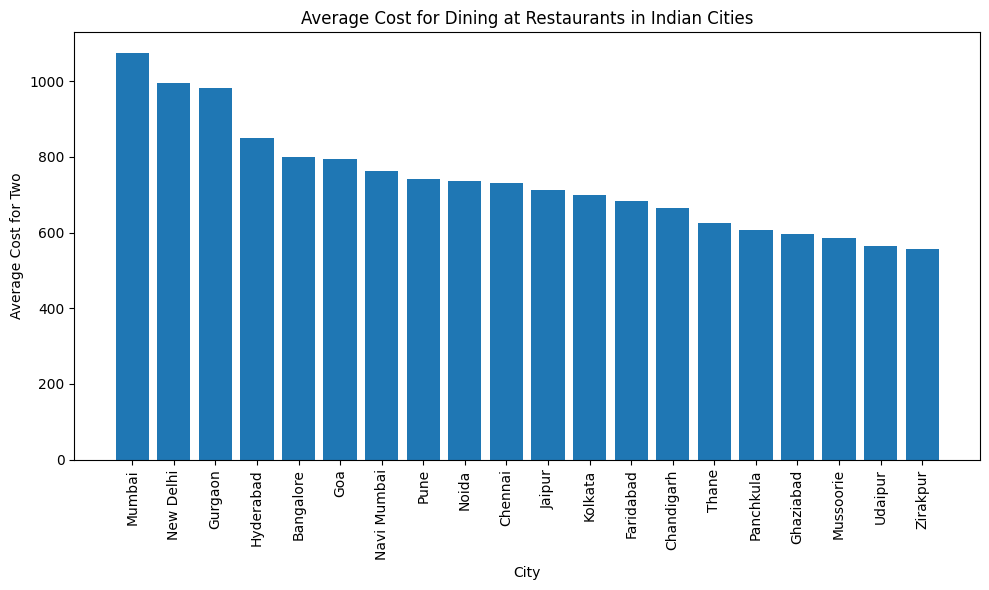

In [258]:
avg_cost_by_city = df1.groupby('city')['average_cost_for_two'].mean().reset_index()

# Sort the dataframe by average cost in descending order
sorted_avg_cost = avg_cost_by_city.sort_values(by='average_cost_for_two', ascending=False).head(20)

# Plot the result in a dataframe
plt.figure(figsize=(10, 6))
plt.bar(sorted_avg_cost['city'], sorted_avg_cost['average_cost_for_two'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Dining at Restaurants in Indian Cities')

plt.tight_layout()
plt.show()

Mumbai which provides highest number of cuisines also have the highest price for two people. They provide food with an average of Rs 1075.New Delhi provides the same in Rs 995. Banglore is providing the same for Rs 800.

**8. What are the names of the restaurants in each city in India that have the highest rating?**

In [267]:
# Find the index of the restaurant with the highest rating in each city
max_rating_indexes = df.groupby('city')['aggregate_rating'].idxmax()

# Retrieve the rows with the highest-rated restaurants using the index
highest_rated_restaurants = df.loc[max_rating_indexes]

# Print the highest-rated restaurant in each city
for _, restaurant in highest_rated_restaurants.iterrows():
    print(f"Highest rated restaurant in {restaurant['city']}: {restaurant['name']} with a rating of {restaurant['aggregate_rating']}")


Highest rated restaurant in Agra: The Salt Cafe Kitchen & Bar with a rating of 4.9
Highest rated restaurant in Ahmedabad: Buttercupp with a rating of 4.9
Highest rated restaurant in Ajmer: Mango Masala Restaurant with a rating of 4.8
Highest rated restaurant in Alappuzha: Arabian Shake with a rating of 4.0
Highest rated restaurant in Allahabad: Eat On with a rating of 4.8
Highest rated restaurant in Amravati: Hotel Abdullah with a rating of 4.9
Highest rated restaurant in Amritsar: La Roma Pizzeria with a rating of 4.9
Highest rated restaurant in Aurangabad: Green Leaf with a rating of 4.9
Highest rated restaurant in Bangalore: Biergarten with a rating of 4.9
Highest rated restaurant in Bhopal: Kebabsville - Sayaji Hotel with a rating of 4.9
Highest rated restaurant in Bhubaneshwar: Chili's Grill & Bar with a rating of 4.9
Highest rated restaurant in Chandigarh: The Great Bear with a rating of 4.9
Highest rated restaurant in Chennai: Coal Barbecues with a rating of 4.9
Highest rated re

In [266]:
data = pd.read_csv("zomato-restaurants-in-india/zomato_restaurants_in_India.csv")

# Find the maximum rating for each city
max_ratings = data.groupby('city')['aggregate_rating'].max()

# Filter the data to get the restaurants with the highest rating in each city
highest_rated_restaurants = data[data.groupby('city')['aggregate_rating'].transform(max) == data['aggregate_rating']]

# Create a scatter plot with hovering points
fig = px.scatter(highest_rated_restaurants, x='city', y='name', hover_data=['aggregate_rating'],
                 title='Restaurants with the Highest Rating in Indian Cities')

# Adjust the layout
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Display the graph
fig.show()


Using this graph you can go through each city to know the rating of the best restaurants with their rating as well.

## Summary

After doing an Exploratory Data Analysis on Zomato Restaurants in India in which we followed the following:
 1. First we downloaded the Data from Kaggle.
 2. We the performed Data preparation and cleaning using Pandas
 3. We performed Exploratory analysis and visualization along with asking and answering the questions related to this dataset to get better insights.

## Conclusion

The Zomato Restaurant dataset provides us the insight to better understand the restaurant industry in India. Based on the visualization of this dataset we can have better delivery options, can reach a large number of customers by which they can enjoy their meals at the comfort of their home. Through this dataset, we can have a close look about the cities and restaurants density. We can have culinary trends after having a close look about the cuisines provided by the restaurants.

## Future Work

 1. We can implement a recommendation system based on user preferences,ratings, and restaurant features to provide personalized restaurant recommendations to users.
 2. We can explore the presence and growth of restaurant chains in different cities, and analyze their ratings and customer preferences.
 3. We can use this dataset to investigate the impact of delivery services on restaurant ratings and popularity, and analyze trends in online food delivery platforms.
 4. We can analyze the popularity of different cuisines over time and identify emerging food trends in different cities.

## References
 1. Kaggle.com for the dataset [here](https://www.kaggle.com/)
 2. Lectures from Zero to Data Science Bootcamp by Jovian [here](https://jovian.com/learn/zero-to-data-analyst-bootcamp)
 3. Pandas Documentation [here](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
 4. Seaborn gallery [here](https://python-graph-gallery.com/seaborn/)
 5. Matplotlib gallery [here](https://matplotlib.org/stable/index.html)
 6. Folium Tutorial [here](https://realpython.com/python-folium-web-maps-from-data/)
 7. Plotly documentation [here](https://plotly.com/python/)


In [268]:
!pip install jovian --upgrade --quiet

In [269]:
import jovian

In [270]:
# Execute this to save new versions of the notebook
jovian.commit(project="project-explo-data-analysis")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
